- Design Model.
- Construct loss and optimizer.
- Training loop.
    - Forward  : Compute prediction and loss
    - Backward : Compute Gradiante
    - Update weights and biases.

In [1]:
import torch as t
from torch import nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

In [2]:
train_dataset = torchvision.datasets.MNIST(root='./data',
                                          train=True,
                                          transform=transforms.ToTensor(),
                                          download=True)
test_dataset = torchvision.datasets.MNIST(root='./data',
                                        train=False,
                                        transform=transforms.ToTensor())

In [3]:
# Data loader is creating an iterator that is iterating over a batch of 500 images and labels.
batch_size = 500
train_loader = t.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True)
test_loader = t.utils.data.DataLoader(dataset=test_dataset,
                                         batch_size=batch_size,
                                         shuffle=True)

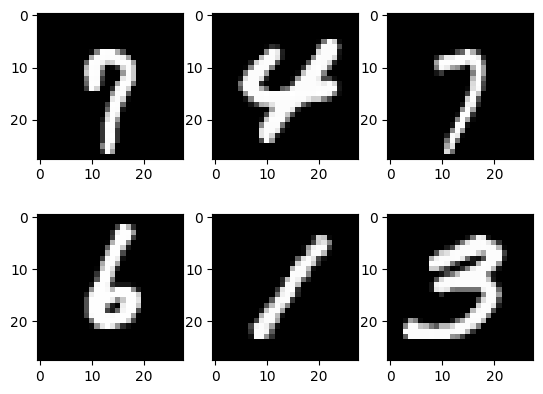

In [4]:
examples = iter(test_loader)
example_data, example_target = next(examples)
# example_data consist of total 500 images
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(example_data[i][0], cmap='gray')

In [5]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, n_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu1 = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, n_classes)
    def forward(self, x):
        out = self.l1(x)
        out = self.relu1(out)
        out = self.l2(out)
        return out
input_size = 784 # 28x28
hidden_size = 500
num_classes = 10

model = NeuralNet(input_size, hidden_size, num_classes)

In [6]:
learning_rate = 0.001

criterean = nn.CrossEntropyLoss()
optim = t.optim.Adam(model.parameters(), lr=learning_rate)

In [7]:
num_epochs = 10
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images=images.reshape(-1, 28* 28)
        outputs=model(images)
        loss=criterean(outputs, labels)
        
        loss.backward()
        
        optim.step()
        optim.zero_grad()
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

Epoch [1/10], Step [100/120], Loss: 0.3483
Epoch [2/10], Step [100/120], Loss: 0.1468
Epoch [3/10], Step [100/120], Loss: 0.2022
Epoch [4/10], Step [100/120], Loss: 0.0784
Epoch [5/10], Step [100/120], Loss: 0.1145
Epoch [6/10], Step [100/120], Loss: 0.0637
Epoch [7/10], Step [100/120], Loss: 0.0731
Epoch [8/10], Step [100/120], Loss: 0.0433
Epoch [9/10], Step [100/120], Loss: 0.0333
Epoch [10/10], Step [100/120], Loss: 0.0524


In [8]:
n_correct = 0
n_samples = len(test_loader.dataset)
with t.no_grad():
    true_positive=0
    for i, (images, labels) in enumerate(test_loader):
        images = images.reshape(-1, 28*28)
        preds = model(images)
        preds = t.max(preds, axis=1)
        preds = preds.indices.data
        n_correct += (preds == labels).sum().item()
acc = 100.0 * n_correct / n_samples
print(f'Accuracy of the model: {acc} %')

            

Accuracy of the model: 97.87 %


original value: 	3
Predicted value:	3


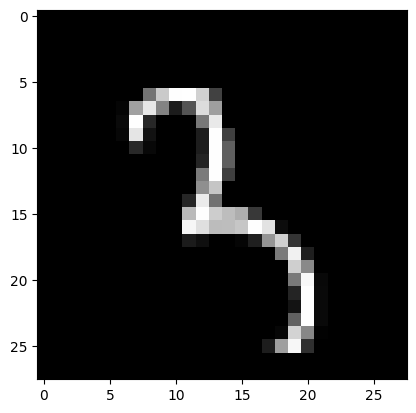

In [11]:
with t.no_grad():
    examples = iter(test_loader)
    example_data, example_target = next(examples)
    # example_data consist of total 500 images
    input_val = example_data[0][0]
    print(f'original value: \t{example_target[0].item()}')
    plt.imshow(input_val, cmap='gray')
    input_reshape = input_val.reshape(-1, 28*28)
    prediction_ = model.forward(input_reshape)
    prediction_ = t.max(prediction_,1)
    print(f'Predicted value:\t{prediction_[1].item()}')